In [5]:
'''
%%writefile gap.py
start = time.time()
end = time.time()
print(end-start)
'''
import tensorflow as tf
#import tensorflow_probability as tfp
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sn
import os as os
import sys
from pathlib import Path

mhsdir = Path(os.getcwd()).parent
sys.path.append(os.path.join(mhsdir, 'src'))

import ns
#import gap

datarawdir = os.path.join(mhsdir, 'data\\raw\\YC')
dataprepdir = os.path.join(mhsdir, 'data\\preprocessed')
dataprepnsdir = os.path.join(mhsdir, 'data\\preprocessed\\ns')

tempdatarawdir = os.path.join(mhsdir, 'temp\\data\\raw\\YC')
tempdataprepdir = os.path.join(mhsdir, 'temp\\data\\preprocessed')
tempdataprepnsdir = os.path.join(mhsdir, 'temp\\data\\preprocessed\\ns')

modeldir = os.path.join(mhsdir, 'models')


#!pip install -q requests
import requests
import json
import tempfile

In [ ]:
docker pull tensorflow/serving

# 1.Server part

In [ ]:
model, df = ns.SaveNSParameters(srcdir = tempdataprepdir, destdir = tempdataprepnsdir, ww = 13, epochs = 200, thauv = [64])
model = model.modelv[0]

In [7]:
# Fetch the Keras session and save the model
# The signature definition is defined by the input and output tensors,
# and stored with the default serving key

version = 1
export_path = os.path.join(modeldir, str(version))
print('export_path = {}\n'.format(export_path))

tf.keras.models.save_model(
    model,
    export_path,
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None
)

print('\nSaved model:')

export_path = C:\Users\PLDD\Practice\GitHub\Python\MHS\models\1

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: C:\Users\PLDD\Practice\GitHub\Python\MHS\models\1\assets

Saved model:


In [ ]:
!saved_model_cli show --dir {export_path} --all

In [ ]:
docker run -p 8501:8501 --mount type=bind,source=C:/Users/PLDD/Practice/GitHub/Python/MHS/models,target=/models/my_model -e MODEL_NAME=my_model -t tensorflow/serving

In [ ]:
docker run -p 8501:8501 --mount type=bind,source=C:/Users/PLDD/Practice/GitHub/Python/MHS/models,target=/models/my_model -e MODEL_NAME=my_model -t tensorflow/serving
        C:\Users\PLDD\Practice\GitHub\Python\MHS

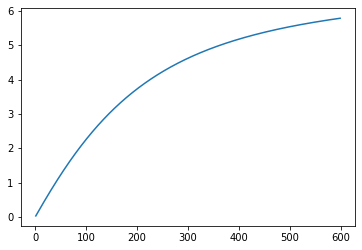

In [8]:
time_seq = np.arange(600)
data = json.dumps({"signature_name": "serving_default", "instances": time_seq.tolist()})
headers = {"content-type": "application/json"}
json_response = requests.post('http://localhost:8501/v1/models/my_model:predict', data=data, headers=headers)
y = json.loads(json_response.text)['predictions']
plt.plot(time_seq,y)

In [ ]:
!docker run --help